In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [3]:
df=pd.read_excel('dataset without month.xlsx')
df.head()

,Region,Year,Avg. Temp.,Max Temp.,Min Temp.,Humidity%,Total Death
0,East of England,2012,10.1,29.4,-8.2,81,18
1,East of England,2013,9.8,30.1,-5.6,80,8
2,East of England,2014,10.9,31.0,-4.9,79,1
3,East of England,2015,10.5,33.0,-6.3,78,5
4,East of England,2016,10.2,32.3,-7.1,80,0


In [5]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False)
# Convert categorical 'region' and 'weather' to dummy variables
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

# Display the cleaned and encoded DataFrame columns
df_encoded.columns

Index(['year', 'avg_temp', 'max_temp', 'min_temp', 'humidity%', 'total_death',
       'region_East of England', 'region_London', 'region_North East',
       'region_North West', 'region_Scotland', 'region_South East',
       'region_South West', 'region_Wales', 'region_West Midlands',
       'region_Yorkshire and The Humber'],
      dtype='object')

In [9]:
df_new=df.drop(columns=['region','year'])
df_new.head()

,avg_temp,max_temp,min_temp,humidity%,total_death
0,10.1,29.4,-8.2,81,18
1,9.8,30.1,-5.6,80,8
2,10.9,31.0,-4.9,79,1
3,10.5,33.0,-6.3,78,5
4,10.2,32.3,-7.1,80,0


In [11]:
df_new.corr()['total_death']

avg_temp      -0.453086
max_temp      -0.260742
min_temp      -0.313886
humidity%      0.313226
total_death    1.000000
Name: total_death, dtype: float64

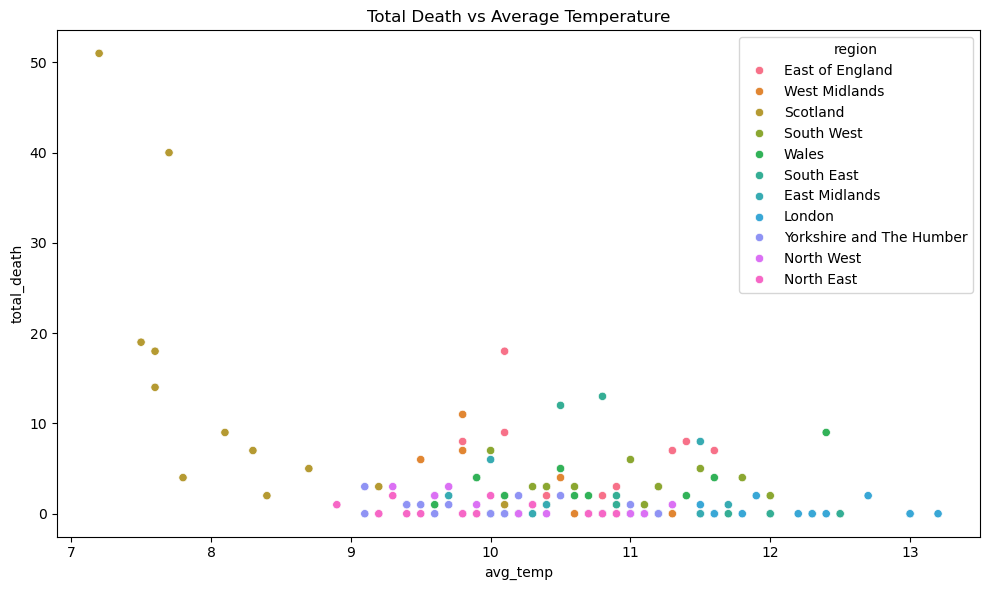

In [80]:
# 4. Total Death vs Avg_Temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='total_death', hue='region', data=df)
plt.title('Total Death vs Average Temperature')
plt.tight_layout()
plt.show()

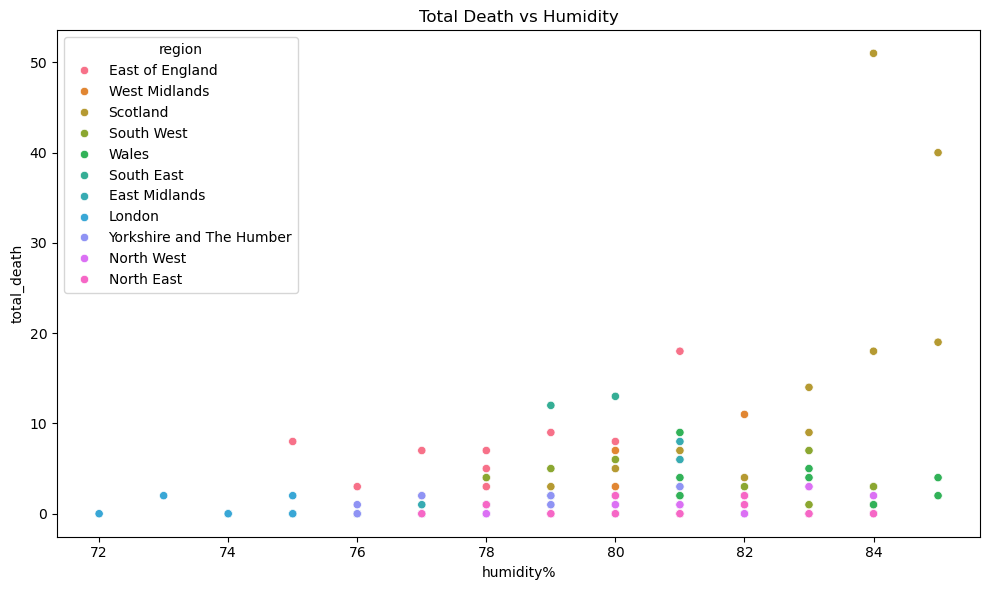

In [84]:
# 4. Total Death vs Avg_Temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity%', y='total_death', hue='region', data=df)
plt.title('Total Death vs Humidity')
plt.tight_layout()
plt.show()

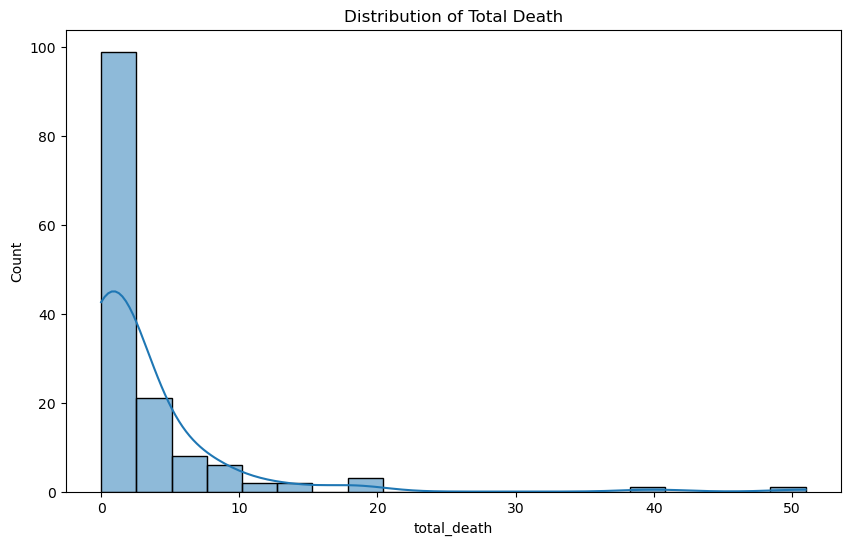

In [15]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_new['total_death'], bins=20, kde=True)
plt.title('Distribution of Total Death')
plt.show()

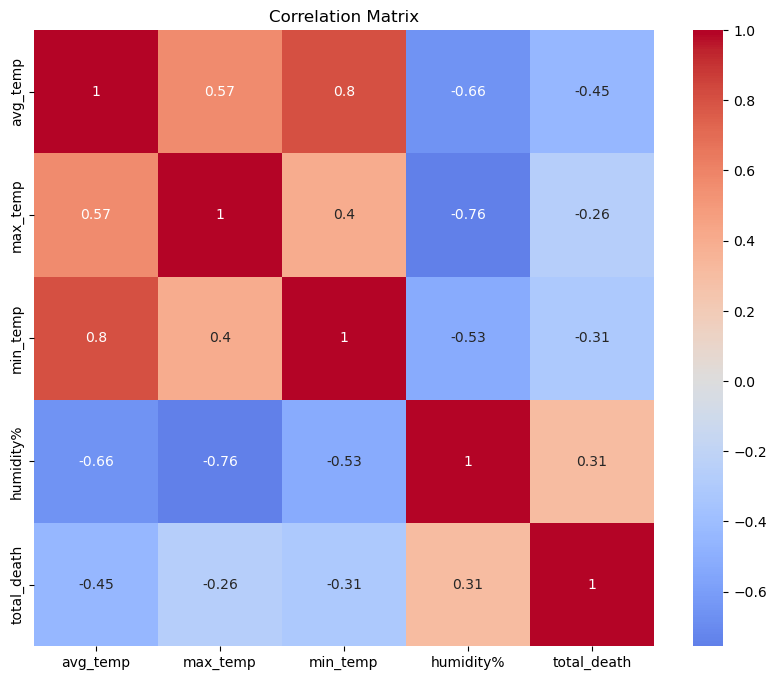

In [17]:
# Correlation matrix
corr_matrix = df_new.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Prepare data for modeling
X = df_new[['avg_temp', 'max_temp', 'min_temp', 'humidity%']]
y = df_new['total_death']

In [62]:
# Add constant for statsmodels (intercept term)
X_sm = sm.add_constant(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features (optional but often helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Evaluation:
Mean Absolute Error: 5.48
Mean Squared Error: 108.35
R-squared: 0.06


In [66]:
# Using statsmodels for detailed statistics
sm_model = sm.OLS(y, X_sm).fit()
print("\nRegression Summary:")
print(sm_model.summary())


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            total_death   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     9.359
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.01e-06
Time:                        22:31:37   Log-Likelihood:                -449.20
No. Observations:                 143   AIC:                             908.4
Df Residuals:                     138   BIC:                             923.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1795     31.54

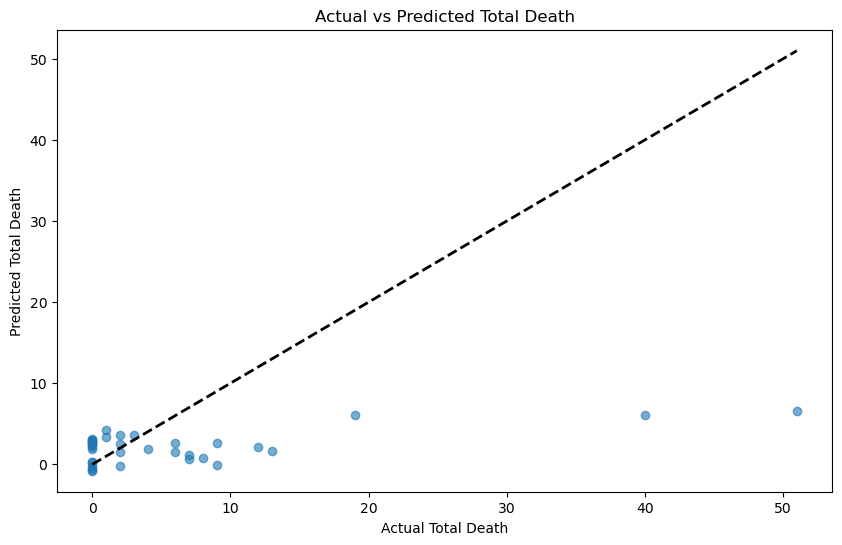

In [50]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Total Death')
plt.ylabel('Predicted Total Death')
plt.title('Actual vs Predicted Total Death')
plt.show()

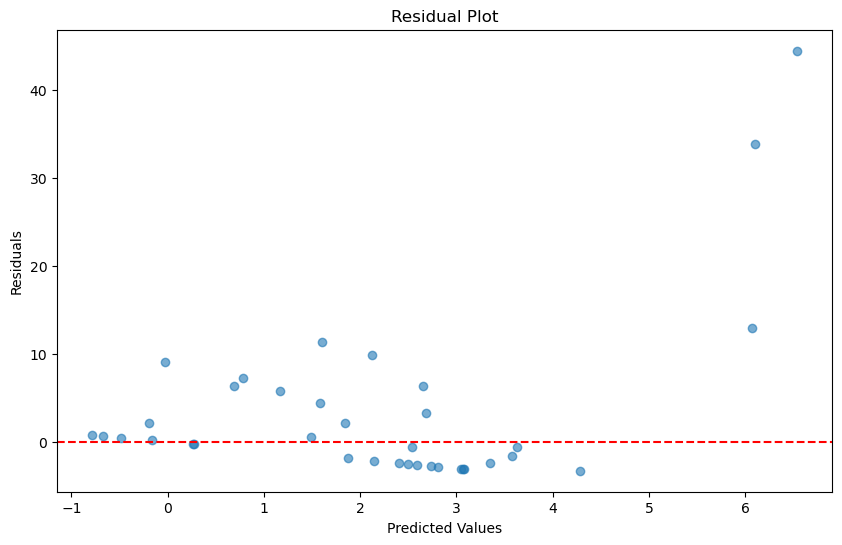

In [48]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

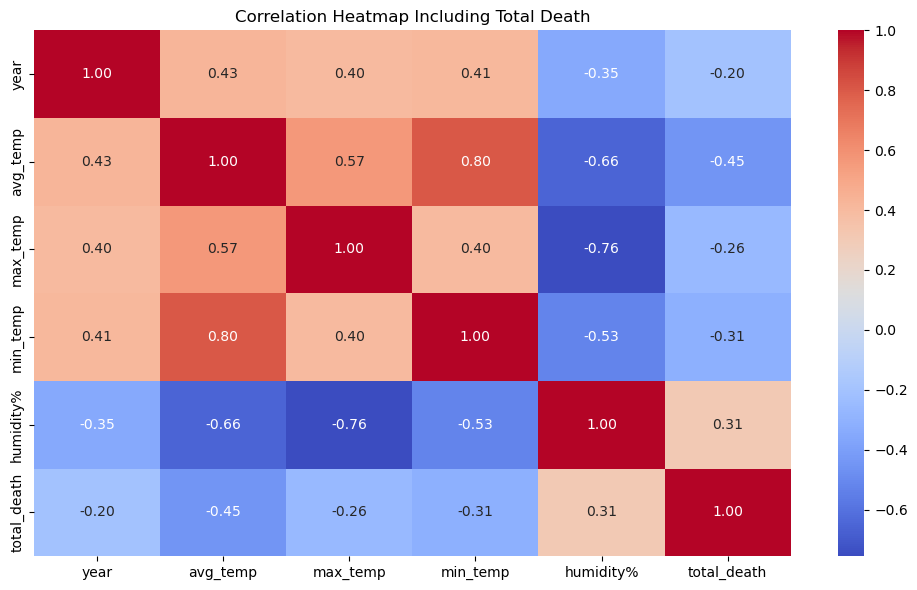

In [72]:
# 3. Correlation Heatmap (includes Total_Death)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Including Total Death')
plt.tight_layout()
plt.show()



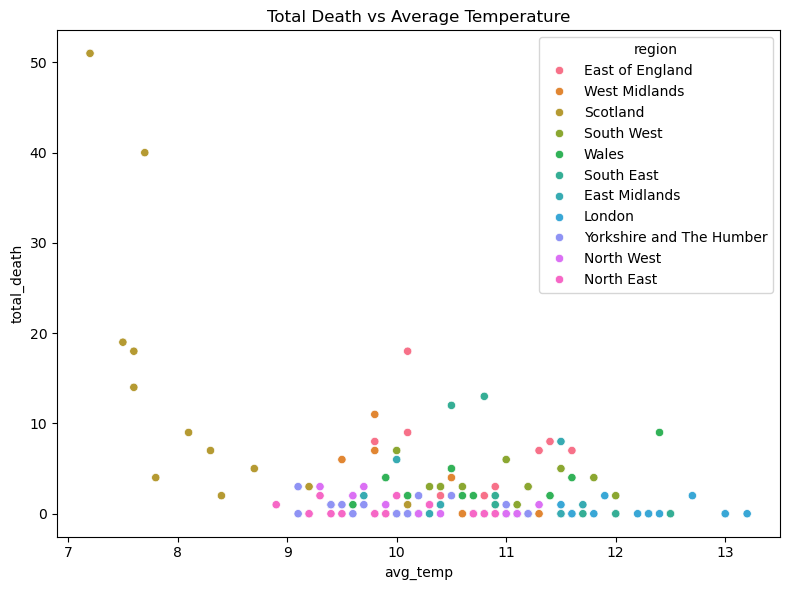

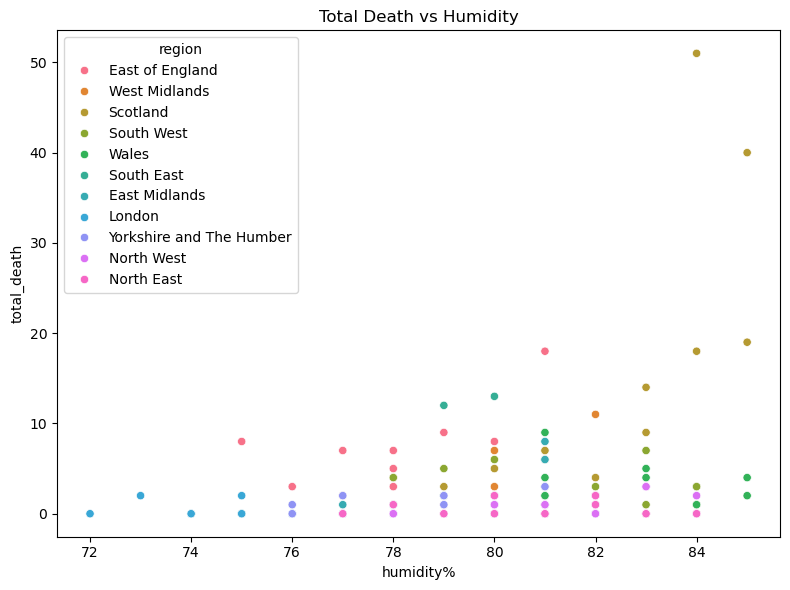